<a href="https://colab.research.google.com/github/Hwaulat/computer-vision/blob/main/image_processing/ip_gradien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://riset.informatika.umm.ac.id/aguseko/batik1.jpg --no-check-certificate

--2021-10-06 10:19:39--  https://riset.informatika.umm.ac.id/aguseko/batik1.jpg
Resolving riset.informatika.umm.ac.id (riset.informatika.umm.ac.id)... 202.52.52.30
Connecting to riset.informatika.umm.ac.id (riset.informatika.umm.ac.id)|202.52.52.30|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 34713 (34K) [image/jpeg]
Saving to: ‘batik1.jpg’

batik1.jpg          100%[===================>]  33.90K  --.-KB/s    in 0s      

2021-10-06 10:19:40 (184 MB/s) - ‘batik1.jpg’ saved [34713/34713]



In [1]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import cv2

Function to display images in Jupyter Notebooks and Google Colab


In [2]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

Implementing Sobel and Scharr kernels with OpenCV


In [3]:
args = {
	"image": "jeruknipis.png",
    "scharr": 0
}

In [5]:
# load the image, convert it to grayscale, and display the original
# grayscale image
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_imshow("Gray", gray)

error: ignored

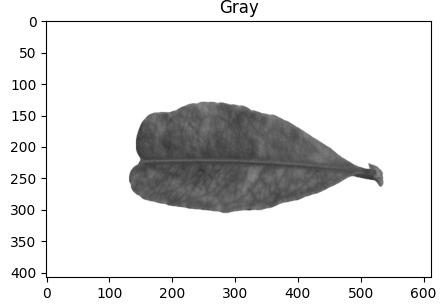

In [6]:
ksize = -1 if args["scharr"] > 0 else 3
gX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=ksize)
gY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=ksize)

gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)

combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)

plt_imshow("Sobel/Scharr X", gX)
plt_imshow("Sobel/Scharr Y", gY)
plt_imshow("Sobel/Scharr Combined", combined)

NameError: ignored

In [7]:
cv2.waitKey(0)
cv2.destroyAllWindows()

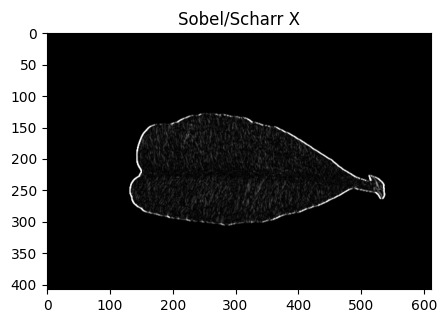

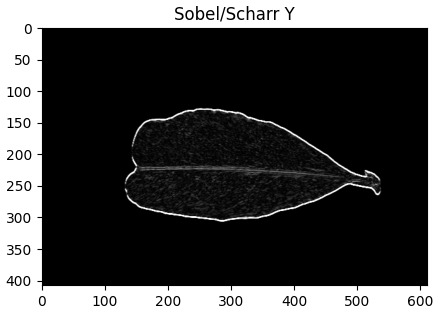

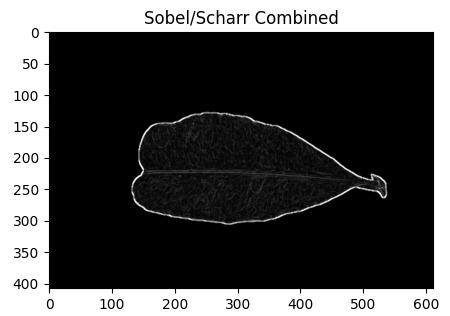

Computing gradient magnitude and orientation with OpenCV


In [ ]:
gX = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
gY = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
# compute the gradient magnitude and orientation
magnitude = np.sqrt((gX ** 2) + (gY ** 2))
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180

NameError: ignored

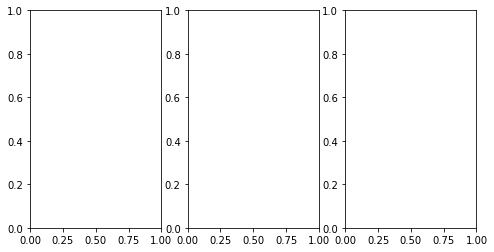

In [9]:
(fig, axs) = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
# plot each of the images
axs[0].imshow(gray, cmap="gray")
axs[1].imshow(magnitude, cmap="jet")
axs[2].imshow(orientation, cmap="jet")
# set the titles of each axes
axs[0].set_title("Grayscale")
axs[1].set_title("Gradient Magnitude")
axs[2].set_title("Gradient Orientation [0, 180]")
# loop over each of the axes and turn off the x and y ticks
for i in range(0, 3):
	axs[i].get_xaxis().set_ticks([])
	axs[i].get_yaxis().set_ticks([])
# show the plots
plt.tight_layout()
plt.show()

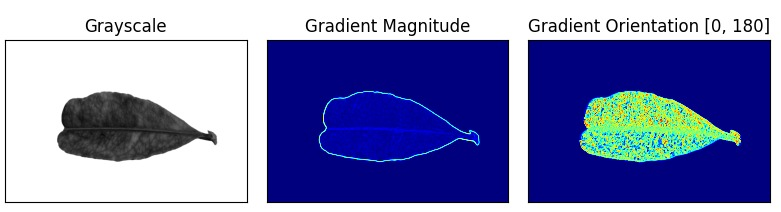